In [7]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [8]:
df = pd.read_csv("D:\\Titanic-Dataset.csv")
print(df.head())
print(df.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

In [9]:
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
if 'Age' in df.columns:
    median_age = df['Age'].median()
    df['Age'].fillna(median_age, inplace=True)

if 'Embarked' in df.columns:
    mode_embarked = df['Embarked'].mode()[0]
    df['Embarked'].fillna(mode_embarked, inplace=True)

# Drop Cabin if it exists
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)
print("\nNull Values After Cleaning:\n", df.isnull().sum())


Null Values After Cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\aakan\AppData\Local\Temp\ipykernel_24164\26372965.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
C:\Users\aakan\AppData\Local\Temp\ipykernel_24164\26372965.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

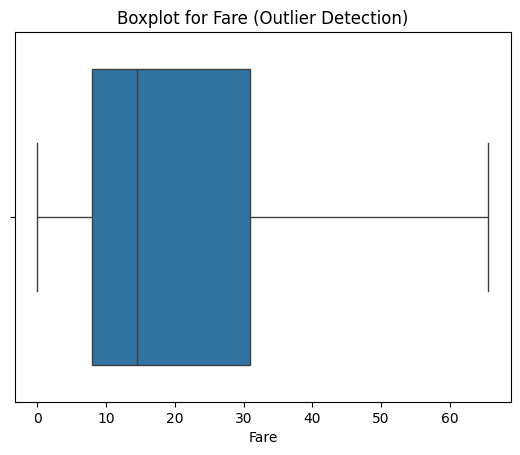

In [13]:
## 3.3 Check for outliers in 'Fare'
sns.boxplot(data=df, x='Fare')
plt.title("Boxplot for Fare (Outlier Detection)")
plt.show()



In [12]:
# Optionally: Cap outliers using IQR method
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Fare'] = np.where(df['Fare'] > upper_bound, upper_bound, df['Fare'])

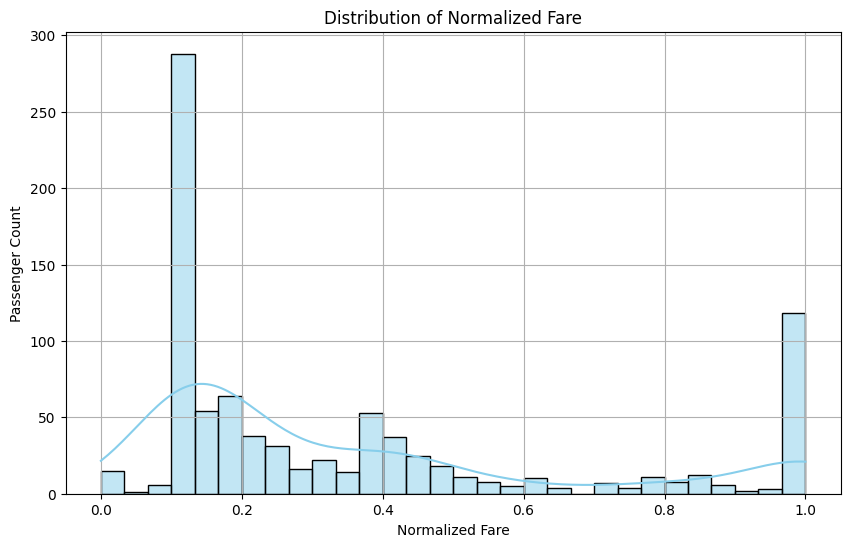

In [14]:
## 3.4 Normalize the 'Fare' column
scaler = MinMaxScaler()
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])

# Step 4: Visualize the distribution of Fare
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare_scaled', kde=True, bins=30, color='skyblue')
plt.title("Distribution of Normalized Fare")
plt.xlabel("Normalized Fare")
plt.ylabel("Passenger Count")
plt.grid(True)
plt.show()

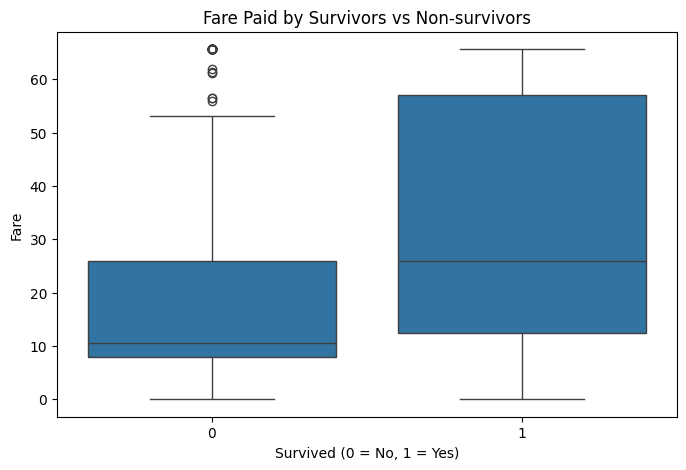

In [15]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Paid by Survivors vs Non-survivors")
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()


<Axes: xlabel='Fare', ylabel='Count'>

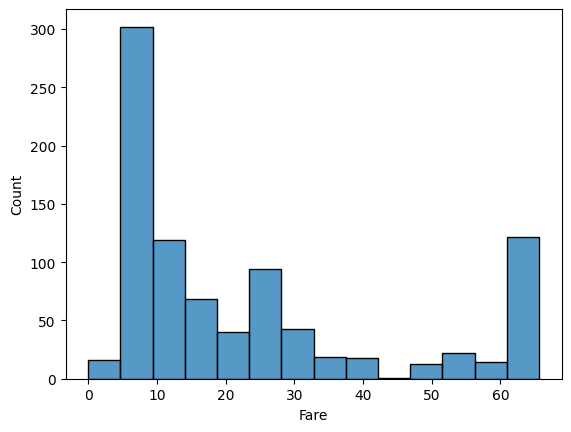

In [16]:
sns.histplot(data=df,x='Fare')

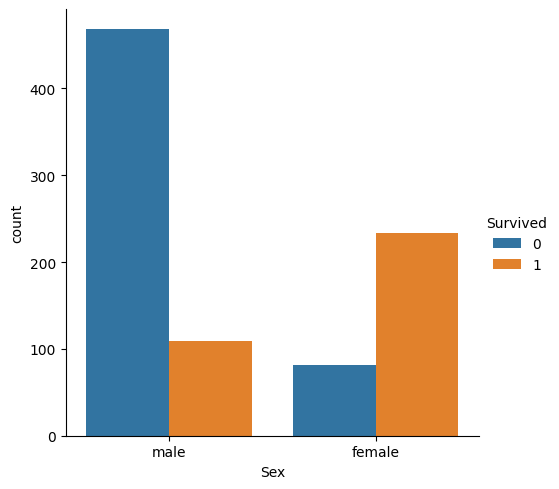

In [17]:

sns.catplot(data=df, x='Sex', hue='Survived', kind='count')